# Interpolációs és regressziós feladatok `scipy` segítségével

**Interpoláció**: A bemeneti adat pontpárjaihoz keressük egy adott függvény paramétereit, amely áthalad a megadott pontpárokon. A függvénynek megfelelő számú paraméterének kell lennie ahhoz, hogy képes legyen a pontpárokhoz tökéletesen illszkedni. Interpoláció során az adatpontok nem tekintjük hibával terheltnek. Tipikus gyakorlati alkalmazása az interpolációnak az ismeretlen adatpontok meghatározása: adat sűrítés, újra mintavételezés.

**Regresszió**: A bemeneti adat pontpárjaihoz keressük egy adott függvény paramétereit, mely a legjobban illeszkedik a pontpárokra. Ekkor a függvény egyenletét ismertnek tekintjük, és annak paramétereit határozzuk meg, oly módon, hogy a függvény és adatpontok közötti eltérést valamilyen szempontból minimalizáljuk. Amennyiben ezen eltérések a függő változóban normális eloszlást követnek, akkor az eltérések négyzeteinek összegét minimalizálva statistikailag optimális és torzítatlan becslést kapunk a függvény paramétereire. Ezt hívjuk legkisebb négyzetek módszerének. A regressziós modellekkel a gyakorlatban sok helyen találkozhatunk kezdve például a mérőállomással bemért fal pontokhoz illesztett sík mérnökgeodézia esetétől a mélytanulásos neurális hálókig, melyeket légi- vagy űrfelvétélek képi interpretációjához használhatnak a geoinformatikai gyakorlatban.

Interpoláció illetve regressziót végrehajthatunk egyváltozós, illetve többváltozós függvényeken is. Ismételjük át az analízis tárgyban tanult mérnöki szempontból releváns valós függvény típusokat:
- **Skalár-skalár függvények vagy egyváltozós valós függvények**: Ezek a függvények az általonos iskolában tanult függvények, melyeknek bemenete egy szám, kimenete egy szám, vagy precízen fogalmazva a függvény értelmezési tartománya a valós számtest, és érték készlete is a valós számtest. A függvények álatlános tulajdonsága, hogy egy bemeneti értékhez csak egy kimeneti érték tartozhat, de egy kimeneti értékhez több bemeneti érték is, vagy precízen, egy értelmezési tartománybeli elemet a függvény pontosan egy darab értékészlet beli elemre képez le. Ezt a matematikábn szürjektív leképezének hívják. Így például a kör nem adható meg skalár-skalár függvény formában, hiszen, például az origó középpoontú egység sugarú kör az `X=0` pontban az `Y=1` és `Y=-1` pontokat venné fel, mely sérti a szürjektivítást. 
- **Vektor-skalár függvények vagy görbék**: Ezek a függvények adnak meg tetszőleges görbét a síkon, vagy magasabb dimenziós térben. Bemenete egy szám, kimenete egy adott dimenziós vektor, vagy precízen fogalmazva a függvény értelmezési tartománya a valós számtest, és érték készlete a adott dimenziójú valós vektor tér. A bemeneti változót hívjuk a görbe paraméterének. Példaként említhetjük a kört, spirált, vagy akár az egyenes is megadható ebben a formában. 
- **Skalár-vektor függvények vagy felületek**: Ezek a függvényekkel adhatunk meg  felületeket, például sík, ellipszoid, geoid, domborzat. A bemenete egy vektor a kimenete pedig egy szám, vagy precízen fogalmazva a függvény értelmezési tartománya egy adott dimenziójú valós vektor tér, és érték készlete a valós számtest.
- **Vektor-vektor függvények vagy vektor mezők**: Ezen függvények bemenete egy adott dimenziójú vektor, és kimenete ugyancsak egy vektor, melynek dimenziója eltérhet a bemeneti vektor dimenziójától. Precízen fogalmazva a függvény értelmezési tartománya és érték készlete a valós vektor téren van definiálva. A bemeneti változót hívjuk a görbe paraméterének. Vektormezőre példa a gravitációs erőtér, mely megadja a Föld egy adott pontján (bemeneti vektor) a gravitáció irányát és nagyságát (kimeneti vektor).

## Példa: Alkohol hatása a mérés pontosságára 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = np.loadtxt('data/bac.txt', delimiter=',', skiprows=1)
bac               = data[:, 0]
measurement_error = data[:, 1]

Text(0, 0.5, 'Mérési hiba ["]')

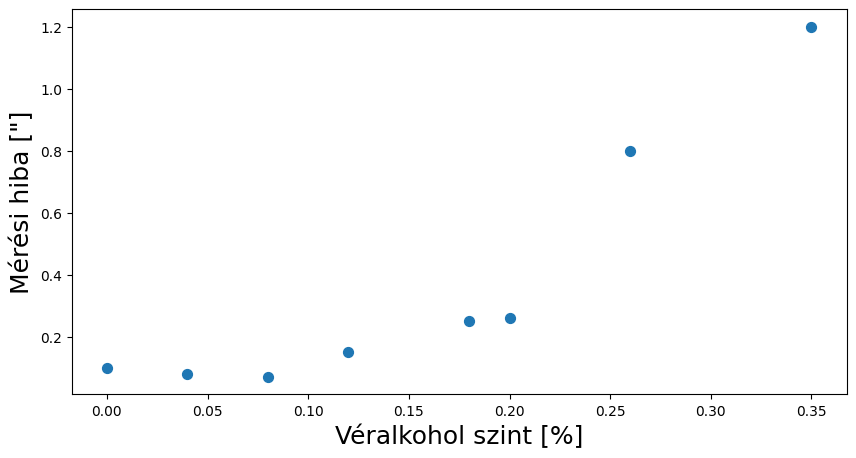

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(bac, measurement_error, s=50)
plt.xlabel('Véralkohol szint [%]', fontsize=18)
plt.ylabel('Mérési hiba ["]', fontsize=18)

In [5]:
from scipy import interpolate
interp_lin = interpolate.interp1d(bac, measurement_error, kind='linear')

In [6]:
plt_x = np.arange(np.min(bac), np.max(bac), 0.01)
plt_y_lin = interp_lin(plt_x)

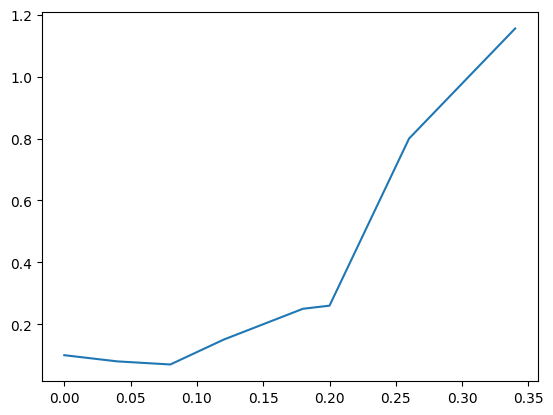

In [7]:
plt.plot(plt_x, plt_y_lin)

Interpolációs függvény típusok: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html.

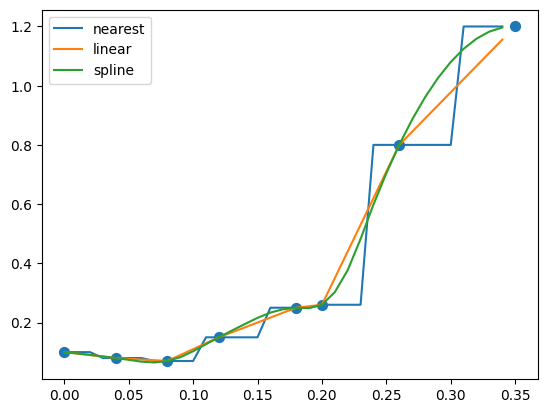

In [8]:
interp_nearest = interpolate.interp1d(bac, measurement_error, kind='nearest')
plt_y_nearest = interp_nearest(plt_x)

interp_spline = interpolate.interp1d(bac, measurement_error, kind='quadratic')
plt_y_spline = interp_spline(plt_x)

plt.scatter(bac, measurement_error, s=50)
plt.plot(plt_x, plt_y_nearest, label='nearest')
plt.plot(plt_x, plt_y_lin, label='linear')
plt.plot(plt_x, plt_y_spline, label='spline')
plt.legend()

In [9]:
p = np.polyfit(bac, measurement_error, 2)
print(p)

[13.06445091 -1.29361931  0.09738621]


In [10]:
plt_y_reg = np.polyval(p, plt_x)

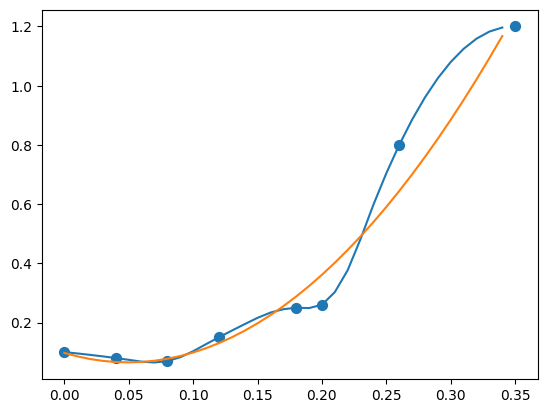

In [11]:
plt.scatter(bac, measurement_error, s=50)
plt.plot(plt_x, plt_y_spline, label='interpolation')
plt.plot(plt_x, plt_y_reg, label='regression')

## Példa: Trajektória interpolálása

In [133]:
import numpy as np

In [134]:
data = np.loadtxt('data/path.txt')
x = data[:, 0]
y = data[:, 1]

In [14]:
dx = np.diff(x)
dy = np.diff(y)
dxy = np.vstack((dx, dy)).T

In [15]:
ds = np.linalg.norm(dxy, axis=1)
print(ds)

[94.43402988 51.81038988 38.53262773 74.05378923 27.58092457 28.67509721
 27.34073152 32.7243961  56.45952975 28.91677714 23.26549806 24.019796
 36.81807301 25.34315687 19.39478796 22.97334542 32.14555801 23.14344832
 21.0079723  20.18132305 43.93595566 55.22353484 63.22393613 41.01468274]


In [16]:
s = np.cumsum(ds)
s = np.hstack((0, s))
print(s)

[  0.          94.43402988 146.24441977 184.7770475  258.83083674
 286.4117613  315.08685851 342.42759003 375.15198613 431.61151588
 460.52829302 483.79379108 507.81358708 544.63166009 569.97481696
 589.36960492 612.34295034 644.48850836 667.63195667 688.63992897
 708.82125202 752.75720768 807.98074252 871.20467865 912.21936139]


In [17]:
import scipy.interpolate

int_x = scipy.interpolate.interp1d(s, x, kind="cubic")
int_y = scipy.interpolate.interp1d(s, y, kind="cubic")

(645762.0274922663, 646152.1426624088, 271933.44999999995, 272424.93000000005)

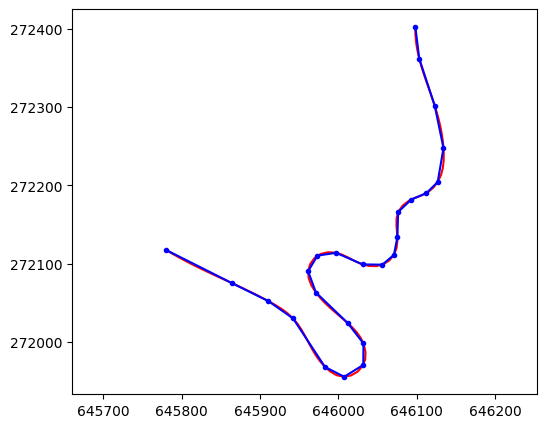

In [18]:
plt.figure(figsize=(6,5))

s_d = np.linspace(s.min(), s.max(), 100)
x_d = int_x(s_d)
y_d = int_y(s_d)
plt.plot(x_d, y_d, 'r-')
plt.plot(x, y, 'b.-')

plt.axis('equal')

## Példa: Sík vertikálistól való megfelelése

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation

![title](figures/wall.jpg)

In [20]:
data = np.loadtxt('data/wall.csv', delimiter=',')
print(data[:5])

[[1.00000000e+00 5.80117481e+06 3.09715239e+05 5.55370000e+01]
 [3.00000000e+00 5.80116053e+06 3.09711634e+05 5.54790000e+01]
 [4.00000000e+00 5.80115994e+06 3.09711431e+05 5.41250000e+01]
 [5.00000000e+00 5.80115862e+06 3.09711062e+05 5.41300000e+01]
 [6.00000000e+00 5.80115794e+06 3.09710929e+05 5.53750000e+01]]


In [21]:
points = data[:, 1:4]
print(points[:5])

[[5.80117481e+06 3.09715239e+05 5.55370000e+01]
 [5.80116053e+06 3.09711634e+05 5.54790000e+01]
 [5.80115994e+06 3.09711431e+05 5.41250000e+01]
 [5.80115862e+06 3.09711062e+05 5.41300000e+01]
 [5.80115794e+06 3.09710929e+05 5.53750000e+01]]


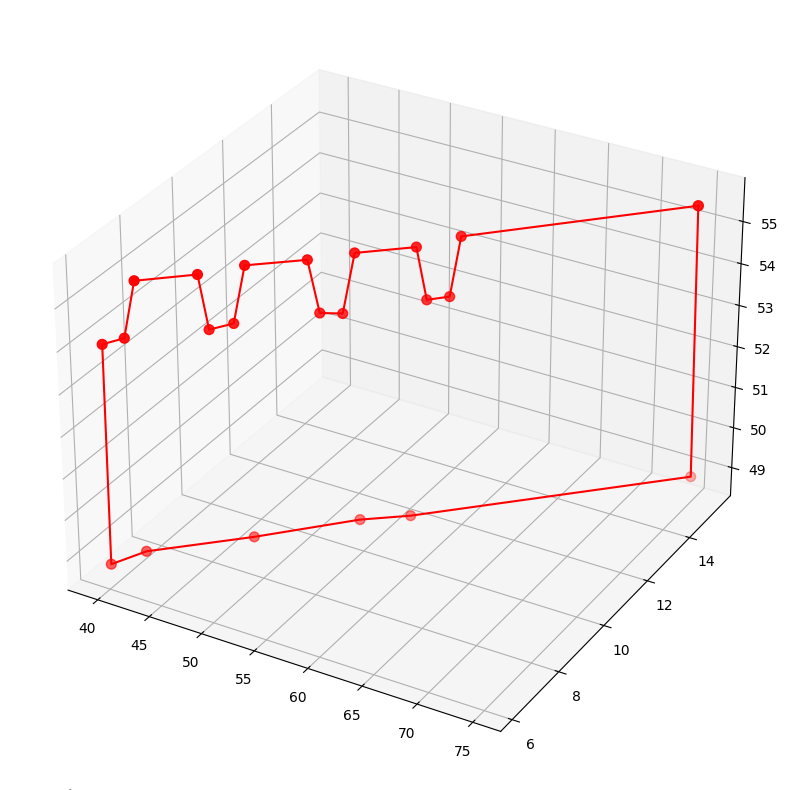

In [22]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot3D(points[:,0], points[:,1], points[:,2], 'r-')
ax.scatter3D(points[:,0], points[:,1], points[:,2], c='r', s=50)

### Előzetes transzformációk

In [23]:
centroid = np.mean(points, axis=0)
points_c = points - centroid

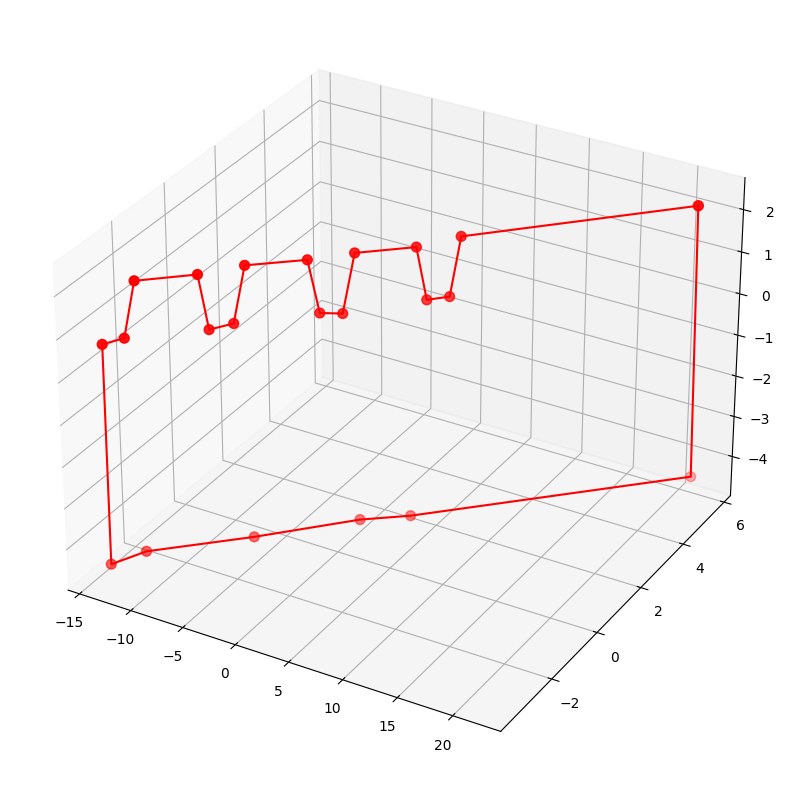

In [24]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot3D(points_c[:,0], points_c[:,1], points_c[:,2], 'r-')
ax.scatter3D(points_c[:,0], points_c[:,1], points_c[:,2], c='r', s=50)

In [25]:
R_local = Rotation.from_euler('xyz', [90, 0, 0], degrees=True).as_matrix()
points_c_r =  points_c @ R_local

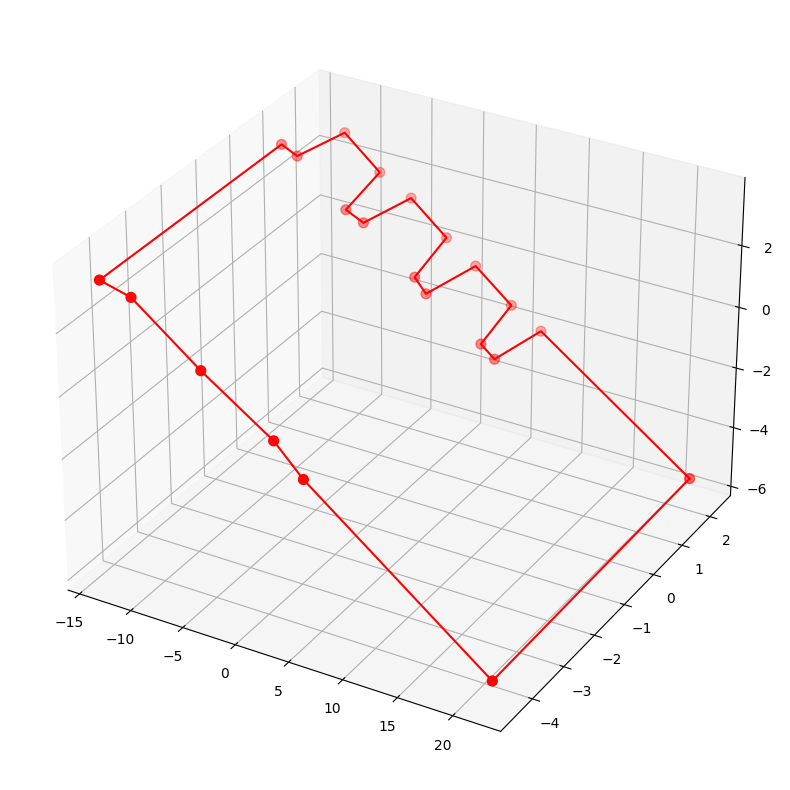

In [26]:
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot3D(points_c_r[:,0], points_c_r[:,1], points_c_r[:,2], 'r-')
ax.scatter3D(points_c_r[:,0], points_c_r[:,1], points_c_r[:,2], c='r', s=50)

### Sík illesztés legkisebb négyzetek módszerével

In [27]:
p_x = points_c_r[:, 0]
p_y = points_c_r[:, 1]
p_z = points_c_r[:, 2]

In [28]:
A = np.vstack((p_x, p_y, np.ones(p_x.shape[0]))).T
b = p_z
x = np.linalg.inv(A.T @ A) @ A.T @ b
print(x)

[-2.57808734e-01 -8.06262847e-03 -1.53425717e-10]


In [29]:
v = A @ x - b
print(v)

[-0.04046585  0.03702611 -0.00243432 -0.0311671   0.00110487 -0.00407598
  0.01300006  0.00753676  0.0052719  -0.00116173 -0.00911155  0.00965221
  0.04257735  0.01515368 -0.00052857 -0.00070917  0.01490353 -0.02950146
 -0.027716   -0.04853021 -0.00248655  0.09212787 -0.04046585]


In [30]:
plane = lambda X, Y: x[0]*X + x[1]*Y + x[2]

In [31]:
minx, maxx = points_c_r[:, 0].min(), points_c_r[:, 0].max()
miny, maxy = points_c_r[:, 1].min(), points_c_r[:, 1].max()
minz, maxz = points_c_r[:, 2].min(), points_c_r[:, 2].max()

X_viz, Y_viz = np.meshgrid(np.arange(minx, maxx, 0.5), np.arange(miny, maxy, 0.5))
Z_viz = plane(X_viz, Y_viz)

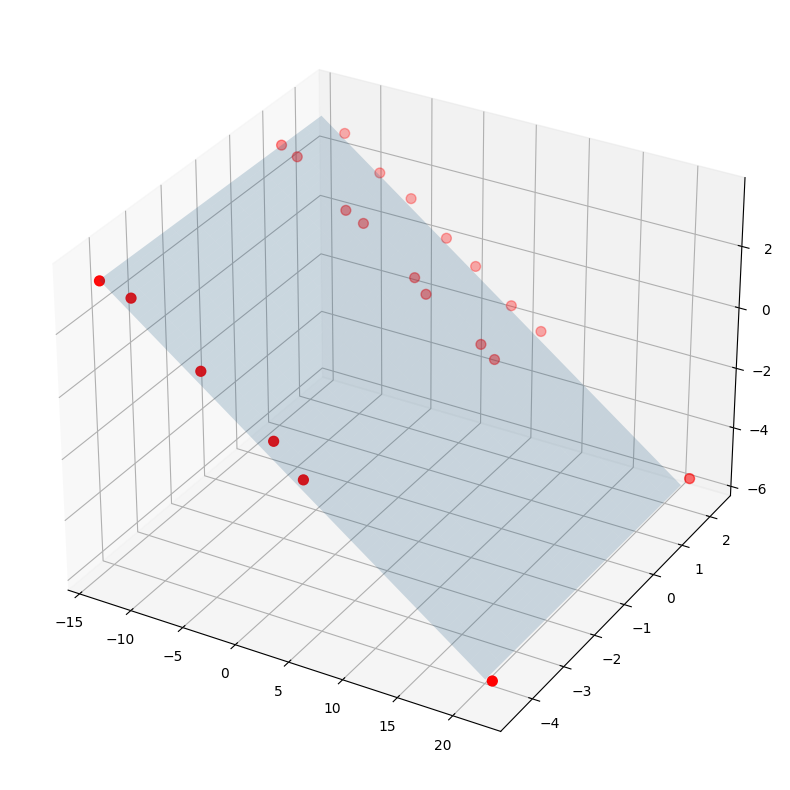

In [32]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X_viz, Y_viz, Z_viz, rstride=1, cstride=1, alpha=0.2)
ax.scatter3D(points_c_r[:,0], points_c_r[:,1], points_c_r[:,2], c='r', s=50)

### Sík illesztése SVD felbontással

Megoldás SVD felbontással a következő: 
1. Először a centroidi koordináták mátrixának összeszorozzuk önmaga transzponáltjával, ezzel előállítva egy "kovariancia" jellegű mátrixot. 
2. Ezután elpállítjuk az SVD felbontást,
3. Majd az U mátrix jobb oldali vektor adja meg a legkisebb értelemben legjobban illeszkedő sík normálisát. 

In [33]:
D = points_c_r.T @ points_c_r
[U, S , V] = np.linalg.svd(D)
n = U[:, -1]

A normálist kicsit átalakítjuk hogy a korábbi sík egyenletbe illeszkedjen:

In [34]:
# a(x-x0) + b(y-y0) + c(z-z0) = 0, where n = [a, b, c]
# if (x0, y0, z0) = (0,0,0), then z = (-ax-by)/c
plane_svd = lambda X, Y: (-n[0]*X -n[1]*Y) / n[2]

Ellenőrizhetjük, hogy ez tényleg egy normális:

In [35]:
z_plane_r = plane_svd(points_c_r[:, 0], points_c_r[:, 1])

check_normal = 0
for k in range(len(points_c_r)):
    p_plane = np.array([points_c_r[k, 0], points_c_r[k, 1], z_plane_r[k]])
    check_normal += np.abs(np.dot(p_plane, n))
print(check_normal)

1.6766530209094517e-15


In [36]:
minx, maxx = points_c_r[:, 0].min(), points_c_r[:, 0].max()
miny, maxy = points_c_r[:, 1].min(), points_c_r[:, 1].max()
minz, maxz = points_c_r[:, 2].min(), points_c_r[:, 2].max()

X_viz, Y_viz = np.meshgrid(np.arange(minx, maxx, 0.5), np.arange(miny, maxy, 0.5))
Z_viz = plane_svd(X_viz, Y_viz)

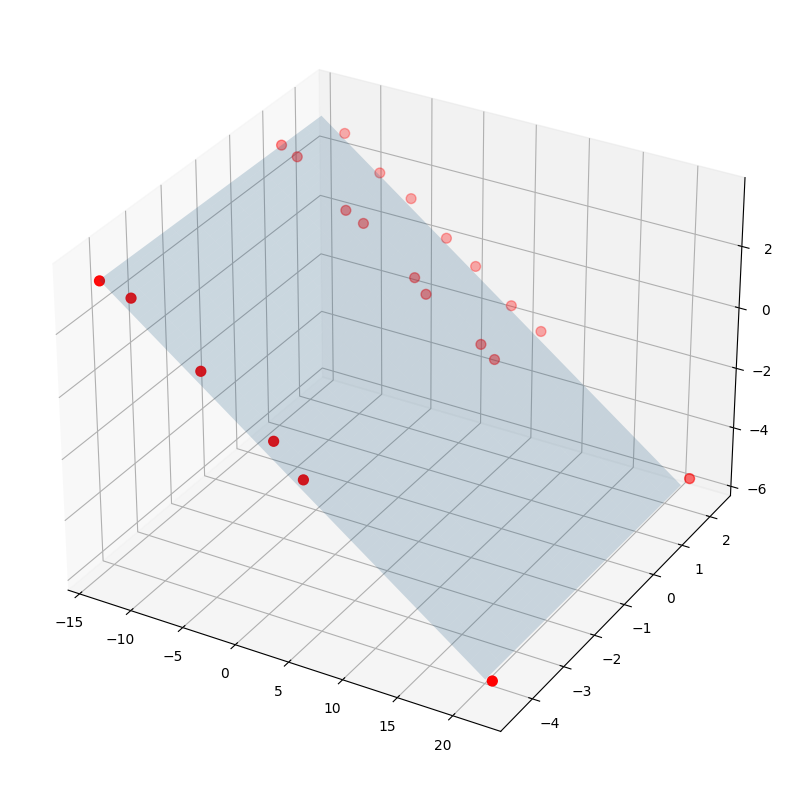

In [37]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X_viz, Y_viz, Z_viz, rstride=1, cstride=1, alpha=0.2)
ax.scatter3D(points_c_r[:,0], points_c_r[:,1], points_c_r[:,2], c='r', s=50)

### Hiba analízis

In [38]:
dz = points_c_r[:, 2] - plane(points_c_r[:, 0], points_c_r[:, 1])

Text(0, 0.5, 'Gyakoriság [cm]')

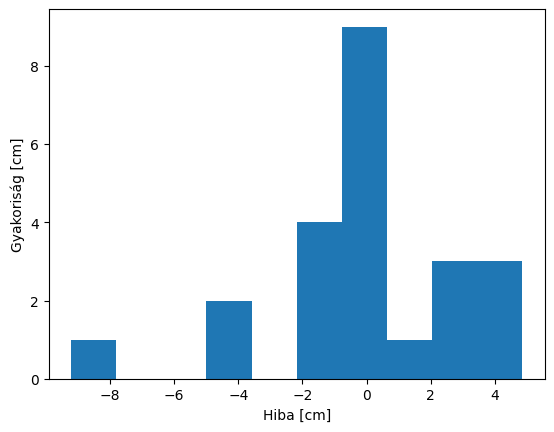

In [49]:
plt.hist(dz*100, bins=10)
plt.xlabel('Hiba [cm]')
plt.ylabel('Gyakoriság [cm]')

In [74]:
print('Legikisebb hiba: ', np.min(dz))
print('Legikisebb abszolút hiba: ', np.min(np.abs(dz)))
print('Legnagyobb hiba: ', np.max(dz))
print('Legnagyobb abszolút hiba: ', np.max(np.abs(dz)))

Legikisebb hiba:  -0.092127874897308
Legikisebb abszolút hiba:  0.0005285705269182372
Legnagyobb hiba:  0.048530210663125906
Legnagyobb abszolút hiba:  0.092127874897308


In [75]:
print('Átlagos hiba: ', np.mean(dz))
print('Átlagos abszolút hiba (MAE): ', np.mean(np.abs(dz)))
print('Szórás: ', np.std(dz))

rmse = np.sqrt(np.sum(np.power(dz, 2)) / len(dz))
print('Középhiba (RMSE): ', rmse)

Átlagos hiba:  6.033820786006285e-19
Átlagos abszolút hiba:  0.02072646505129827
Szórás:  0.030090421173322376
Középhiba vagy RMSE:  0.030090421173322376


Kérdés: a szórás és az középhiba ugyanaz? Vizsgáljuk meg. Tegyük fel, hogy az illesztett sík egy méterrel feljebb helyezkedik el mint amit meghatároztunk. Ez egy extrém eset, de előfordulhat ha egy nagyon nagy kiugró érték szerepel az adatokban. Most ezt csak szimuláljuk azzal, hogy a dz vektorhoz egyet hozzáadunk: 

In [94]:
dz_bias = dz + 1

(array([1., 0., 0., 2., 0., 4., 9., 1., 3., 3.]),
 array([0.90787213, 0.92193793, 0.93600374, 0.95006955, 0.96413536,
        0.97820117, 0.99226698, 1.00633278, 1.02039859, 1.0344644 ,
        1.04853021]),
 <BarContainer object of 10 artists>)

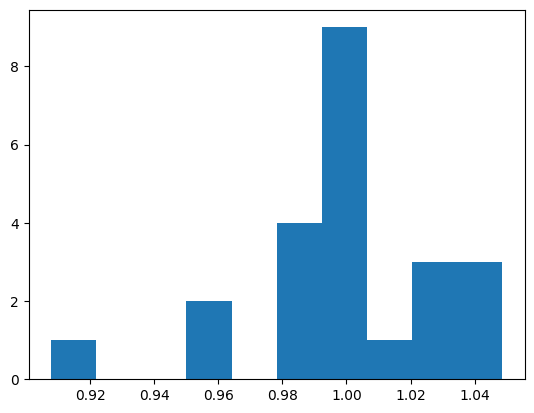

In [95]:
plt.hist(dz_bias)

Nézzük meg így a hibákat jellemző mérőszámainkat:

In [96]:
print('Átlagos hiba: ', np.mean(dz_bias))
print('Szórás: ', np.std(dz_bias))

rmse = np.sqrt(np.sum(np.power(dz_bias, 2)) / len(dz))
print('Középhiba vagy RMSE: ', rmse)

Átlagos hiba:  1.0
Szórás:  0.030090421173322387
Középhiba vagy RMSE:  1.0004526142933448


Tehát a szórás az átlag körüli ingadozást méri, míg a középhiba a mért és becsült model közötti ingadozást írja le. A középhiba így felfogható az átlagos hiba és a szórás eredőjének. Amennyiben az átlagos hiba alacsony, akkor a szórás megegyezik az középhibával.

Most vizsgáljuk meg az átlagos eltéréseket és a mediánt:

In [104]:
print('Átlagos hiba: ', np.mean(dz))
print('Átlagos abszolút hiba (MAE): ', np.mean(np.abs(dz)))
print('Medián hiba: ', np.median(dz))
print('Medián abszolót hiba: ', np.median(np.abs(dz)))

Átlagos hiba:  6.033820786006285e-19
Átlagos abszolút hiba (MAE):  0.02072646505129827
Medián hiba:  0.0007091674770802747
Medián abszolót hiba:  0.013000062433472584


In [105]:
print('Átlagos hiba: ', np.mean(dz_bias))
print('Átlagos abszolút hiba (MAE): ', np.mean(np.abs(dz_bias)))
print('Medián hiba: ', np.median(dz_bias))
print('Medián abszolót hiba: ', np.median(np.abs(dz_bias)))

Átlagos hiba:  1.0
Átlagos abszolút hiba (MAE):  1.0
Medián hiba:  1.0007091674770803
Medián abszolót hiba:  1.0007091674770803


(array([17.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([-0.09212787,  0.01708491,  0.1262977 ,  0.23551049,  0.34472328,
         0.45393606,  0.56314885,  0.67236164,  0.78157443,  0.89078721,
         1.        ]),
 <BarContainer object of 10 artists>)

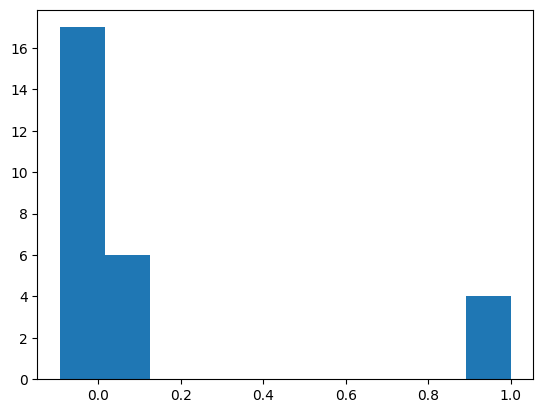

In [102]:
dz_gross = np.hstack((dz, np.array([1.0, 1.0, 1.0, 1.0])))
plt.hist(dz_gross)

In [107]:
print('Átlagos hiba: ', np.mean(dz_gross))
print('Átlagos abszolút hiba (MAE): ', np.mean(np.abs(dz_gross)))
print('Medián hiba: ', np.median(dz_gross))
print('Medián abszolút hiba: ', np.median(np.abs(dz_gross)))

Átlagos hiba:  0.14814814814814814
Átlagos abszolút hiba (MAE):  0.16580402578443926
Medián hiba:  0.0024343160611965953
Medián abszolút hiba:  0.015153675546118794


A nem nulla átlagos és átlagos abszolút hiba modell bias hibát sejtet. Az átlagos és medián hiba nagy különbsége viszont egyértelműen durva hibás mérések jelenlétét jelzi. A bias hiba itt a kiugró mérési hibákból fakad.

In [109]:
print('Hiba 95-ös percentilisen: ', np.percentile(dz, 95))

Hiba 95-ös percentilisen:  0.0404658522947523


In [131]:
percentiles = []
for pcnt in np.arange(0, 100, 10):
    percentiles.append([pcnt, np.percentile(np.abs(dz), pcnt)])
percentiles = np.array(percentiles)

Text(0, 0.5, 'Percentile [%]')

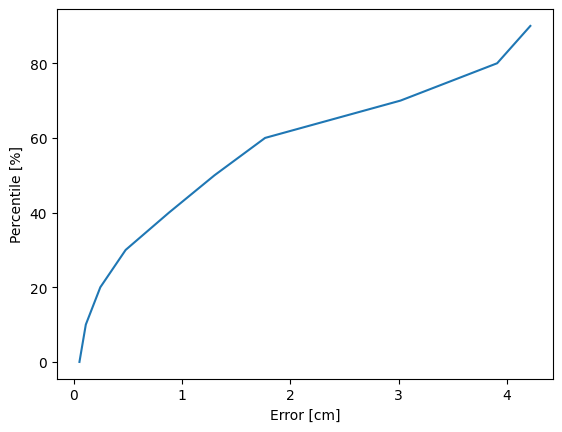

In [132]:
plt.plot(percentiles[:, 1]*100, percentiles[:, 0])
plt.xlabel('Error [cm]')
plt.ylabel('Percentile [%]')

### Becsült sík transzformálása XY síkra

In [39]:
b0 = np.array([0, 0, plane(0, 0)])
b1 = np.array([-1, 0, plane(-1, 0)])
b2 = np.array([0, 1, plane(0, 1)])

v1 = b1 - b0
v1 = v1 / np.linalg.norm(v1)
print('v1 = ', v1)

v2 = b2 - b0
v2 = v2 / np.linalg.norm(v2)
print('v2 = ', v2)

v3 = np.cross(v1, v2)
v3 = v3 / np.linalg.norm(v3)
print('v3 = ', v3)

B = np.vstack((v1, v2, v3))

v1 =  [-0.96833722  0.          0.24964579]
v2 =  [ 0.          0.9999675  -0.00806237]
v3 =  [-0.24963819 -0.00780711 -0.96830771]


In [40]:
points_c_r_p = points_c_r.copy()
points_c_r_p = points_c_r_p @ np.linalg.inv(B)

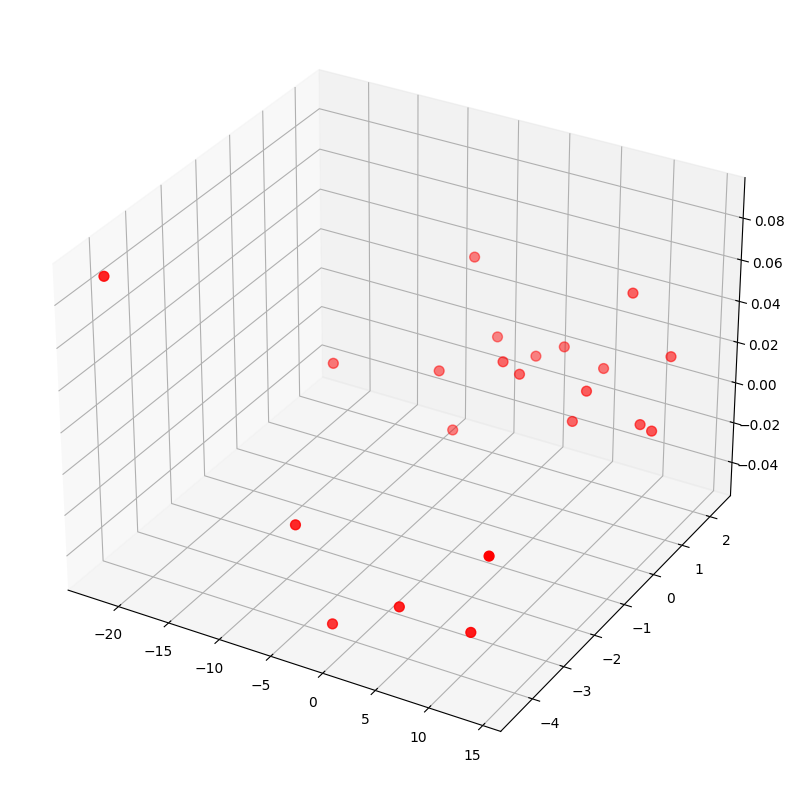

In [41]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter3D(points_c_r_p[:,0], points_c_r_p[:,1], points_c_r_p[:,2], c='r', s=50)

(-24.25409826136906,
 15.813126635108343,
 -4.833716986214311,
 2.5943640045672507)

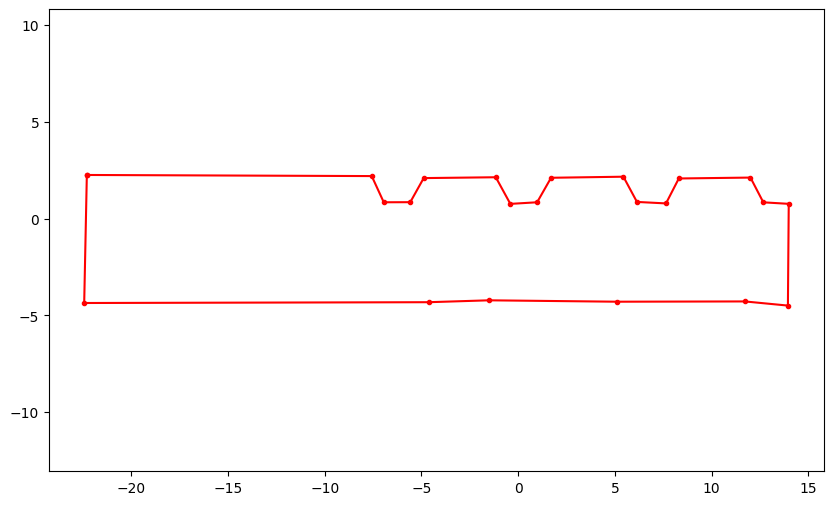

In [42]:
plt.figure(figsize=(10,6))
plt.plot(points_c_r_p[:, 0], points_c_r_p[:, 1], 'r.-')
plt.xlim([-5, 5])
plt.axis('equal')

In [43]:
points_hat_c_r_p = points_c_r.copy()
points_hat_c_r_p[:, 2] = z_plane_r
points_hat_c_r_p = points_hat_c_r_p @ np.linalg.inv(B)

print('chk z (~=0): ', np.sum(np.abs(points_hat_c_r_p[:, 2])))

chk z (~=0):  0.00036530823860780973
